# Preparations

In [1]:
# Fetch packages.
import bionetgen
import json
import matplotlib.pyplot as plt
import statistics
import timeit
import numpy

In [2]:
# Benchmarking functions.
def make_benchmark(model,n):
    def benchmark_func():
        bionetgen.run(model, suppress=True)
    return timeit.Timer(benchmark_func).repeat(repeat=n, number=1)

# Serialises a benchmarking output using JSON.
def serialize(benchmarks,lengs,filename):
    with open('../Benchmarking_results/Prototyping/%s.json'%(filename) , "w") as write:
        json.dump({"benchmarks": benchmarks, "medians": list(1000*numpy.array(list(map(statistics.median, benchmarks)))), "lengs": lengs.tolist()} , write)

In [3]:
# Function for plotting simulation output.
def plot_result(result):
    r = result[0]

    for name in r.dtype.names:
        if name != "time":
            plt.plot(r['time'], r[name], label = name)
    plt.xlabel("time")
    plt.ylabel("species (counts)")
    _ = plt.legend(frameon = False)
    return plt

# Function for plotting benchmarking output.
def plot_benchmark(benchmarks,lengs):
    medians = list(1000*numpy.array(list(map(statistics.median, benchmarks))))
    plt.plot(lengs,medians,linewidth=4)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim([lengs[0],lengs[-1]])
    plt.ylim([0.001,1.2*numpy.max(medians)])    # Choice of ymin does skew how plot appears.

# Benchamarks

### Multistate

In [6]:
# Load model.
multistate_ss_time = 2
model_multistate = bionetgen.bngmodel('../Data/multistate.bngl')
model_multistate_no_obs = bionetgen.bngmodel('../Data/multistate_no_obs.bngl')

CPU times: user 4.19 ms, sys: 0 ns, total: 4.19 ms
Wall time: 123 ms


gdats from 0 models: 
cdats from 1 models: multistate_no_obs 

CPU times: user 5.15 ms, sys: 875 µs, total: 6.02 ms
Wall time: 194 ms


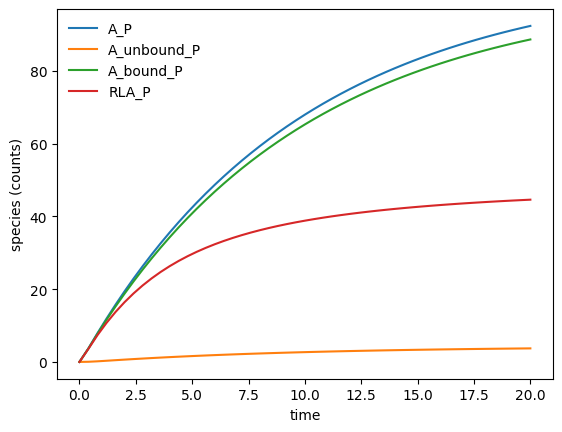

In [26]:
# Check ODE simulation output.
model_multistate.actions[0].args['atol'] = 1e-12
model_multistate.actions[0].args['rtol'] = 1e-6
model_multistate.actions[0].args['t_end'] = multistate_ss_time   
model_multistate.actions[0].args['n_steps'] = 50
%time result_multistate_ODE = bionetgen.run(model_multistate, suppress=True);
fig1 = plot_result(result_multistate_ODE)
plt.savefig('../Plots/Trajectories/BioNetGen/multistate_ode.png')
plt.savefig('../Plots/Trajectories/BioNetGen/multistate_ode.pdf')

In [27]:
# Check ODE simulation time.
model_multistate_no_obs.actions[0].args['atol'] = 1e-12
model_multistate_no_obs.actions[0].args['rtol'] = 1e-6
model_multistate_no_obs.actions[0].args['t_end'] = multistate_ss_time   
model_multistate_no_obs.actions[0].args['n_steps'] = 50
%time bionetgen.run(model_multistate_no_obs, suppress=True);

CPU times: user 0 ns, sys: 5.65 ms, total: 5.65 ms
Wall time: 166 ms


gdats from 0 models: 
cdats from 1 models: multistate_no_obs 

CPU times: user 5.18 ms, sys: 916 µs, total: 6.1 ms
Wall time: 187 ms


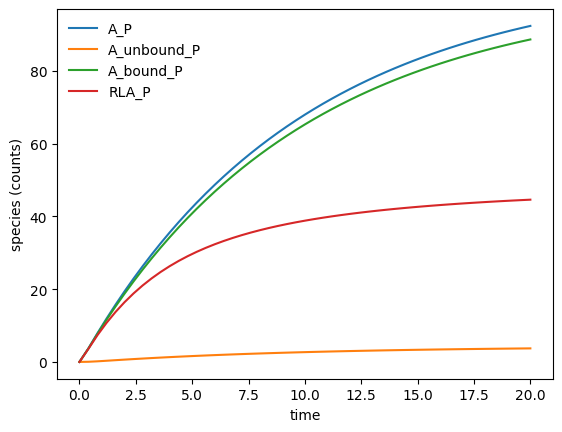

In [28]:
# Check (sparse) ODE simulation output.
model_multistate.actions[0].args['sparse'] = 1
%time result_multistate_ODE_sparse = bionetgen.run(model_multistate, suppress=True);
plot_result(result_multistate_ODE_sparse)
plt.savefig('../Plots/Trajectories/BioNetGen/multistate_ode_sparse.png')
plt.savefig('../Plots/Trajectories/BioNetGen/multistate_ode_sparse.pdf')

In [29]:
# Check (sparse) ODE simulation time.
model_multistate_no_obs.actions[0].args['sparse'] = 1
%time bionetgen.run(model_multistate_no_obs, suppress=True);

CPU times: user 4.57 ms, sys: 453 µs, total: 5.02 ms
Wall time: 160 ms


gdats from 0 models: 
cdats from 1 models: multistate_no_obs 

#### Gillespie

In [30]:
# Prepare model for Gillespie simulations.
model_multistate.actions[0].args['t_end'] = multistate_ss_time 
model_multistate.actions[0].args['n_steps'] = 50
model_multistate.actions[0].args['method'] = '"ssa"'    
model_multistate_no_obs.actions[0].args['t_end'] = multistate_ss_time 
model_multistate_no_obs.actions[0].args['n_steps'] = 50
model_multistate_no_obs.actions[0].args['method'] = '"ssa"'    

CPU times: user 5 ms, sys: 0 ns, total: 5 ms
Wall time: 188 ms


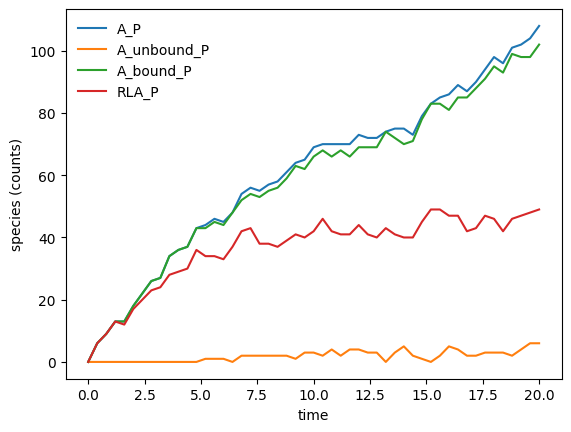

In [31]:
# Check Gillespie simulation output.
%time result_multistate_Gillespie = bionetgen.run(model_multistate, suppress=True);
plot_result(result_multistate_Gillespie)
plt.savefig('../Plots/Trajectories/BioNetGen/multistate_ssa.png')
plt.savefig('../Plots/Trajectories/BioNetGen/multistate_ssa.pdf')

In [32]:
# Check Gillespie simulation time.
%time bionetgen.run(model_multistate_no_obs, suppress=True);

CPU times: user 2.8 ms, sys: 2.16 ms, total: 4.95 ms
Wall time: 178 ms


gdats from 0 models: 
cdats from 1 models: multistate_no_obs 

### Multisite2

In [33]:
# Load model.
multisite2_ss_time = 2
model_multisite2 = bionetgen.bngmodel('../Data/multisite2.bngl')
model_multisite2_no_obs = bionetgen.bngmodel('../Data/multisite2_no_obs.bngl')

CPU times: user 4.51 ms, sys: 406 µs, total: 4.92 ms
Wall time: 303 ms


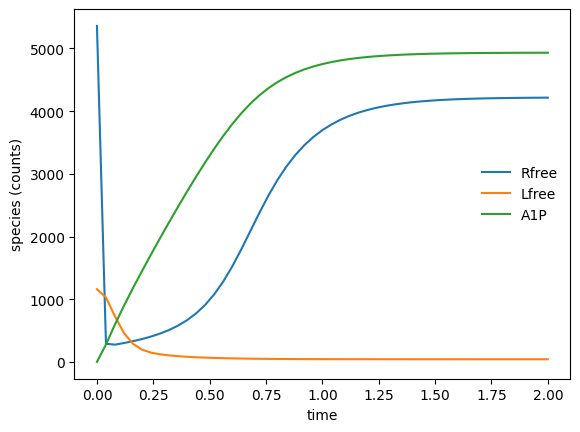

In [34]:
# Check ODE simulation output.
model_multisite2.actions[0].args['atol'] = 1e-12
model_multisite2.actions[0].args['rtol'] = 1e-6
model_multisite2.actions[0].args['t_end'] = multisite2_ss_time 
model_multisite2.actions[0].args['n_steps'] = 50
%time result_multisite2_ODE = bionetgen.run(model_multisite2, suppress=True);
plot_result(result_multisite2_ODE)
plt.savefig('../Plots/Trajectories/BioNetGen/multisite2_ode.png')
plt.savefig('../Plots/Trajectories/BioNetGen/multisite2_ode.pdf')

In [35]:
# Check ODE simulation time.
model_multisite2_no_obs.actions[0].args['atol'] = 1e-12
model_multisite2_no_obs.actions[0].args['rtol'] = 1e-6
model_multisite2_no_obs.actions[0].args['t_end'] = multisite2_ss_time 
model_multisite2_no_obs.actions[0].args['n_steps'] = 50
%time bionetgen.run(model_multisite2_no_obs, suppress=True);

CPU times: user 4.63 ms, sys: 490 µs, total: 5.12 ms
Wall time: 308 ms


gdats from 0 models: 
cdats from 1 models: multisite2_no_obs 

CPU times: user 5.52 ms, sys: 1.18 ms, total: 6.7 ms
Wall time: 342 ms


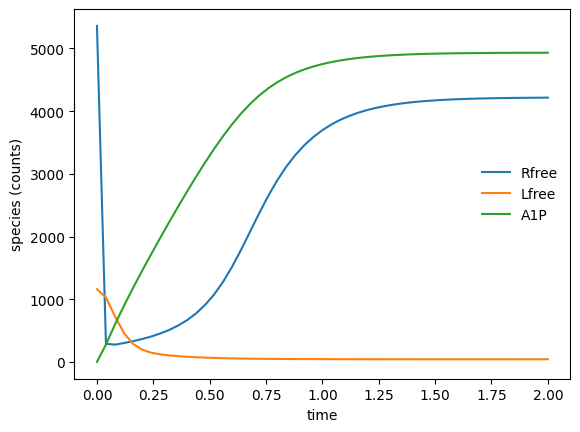

In [36]:
# Check (sparse) ODE simulation output.
model_multisite2.actions[0].args['sparse'] = 1
%time result_multisite2_ODE_sparse = bionetgen.run(model_multisite2, suppress=True);
plot_result(result_multisite2_ODE_sparse)
plt.savefig('../Plots/Trajectories/BioNetGen/multisite2_ode_sparse.png')
plt.savefig('../Plots/Trajectories/BioNetGen/multisite2_ode_sparse.pdf')

In [37]:
# Check (sparse) ODE simulation time.
model_multisite2_no_obs.actions[0].args['sparse'] = 1
%time bionetgen.run(model_multisite2_no_obs, suppress=True);

CPU times: user 5.16 ms, sys: 904 µs, total: 6.07 ms
Wall time: 336 ms


gdats from 0 models: 
cdats from 1 models: multisite2_no_obs 

#### Gillespie

In [38]:
# Prepare model for Gillespie simulations.
model_multisite2.actions[0].args['t_end'] = multisite2_ss_time 
model_multisite2.actions[0].args['n_steps'] = 50
model_multisite2.actions[0].args['method'] = '"ssa"'    
model_multisite2_no_obs.actions[0].args['t_end'] = multisite2_ss_time 
model_multisite2_no_obs.actions[0].args['n_steps'] = 50
model_multisite2_no_obs.actions[0].args['method'] = '"ssa"' 

CPU times: user 4.9 ms, sys: 0 ns, total: 4.9 ms
Wall time: 395 ms


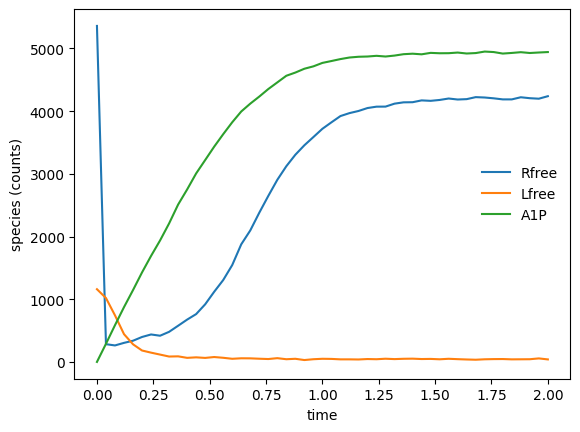

In [39]:
# Check Gillespie simulation output.
%time result_multisite2_Gillespie = bionetgen.run(model_multisite2, suppress=True);
plot_result(result_multisite2_Gillespie)
plt.savefig('../Plots/Trajectories/BioNetGen/multisite2_ssa.png')
plt.savefig('../Plots/Trajectories/BioNetGen/multisite2_ssa.pdf')

In [40]:
# Check Gillespie simulation time.
%time bionetgen.run(model_multisite2_no_obs, suppress=True);

CPU times: user 0 ns, sys: 5.32 ms, total: 5.32 ms
Wall time: 393 ms


gdats from 0 models: 
cdats from 1 models: multisite2_no_obs 

### Egfr_net

In [17]:
# Load model.
egfr_net_ss_time = 10
model_egfr_net = bionetgen.bngmodel('../Data/egfr_net.bngl')
model_egfr_net_no_obs = bionetgen.bngmodel('../Data/egfr_net_no_obs.bngl')

CPU times: user 6 ms, sys: 1.45 ms, total: 7.46 ms
Wall time: 5.35 s


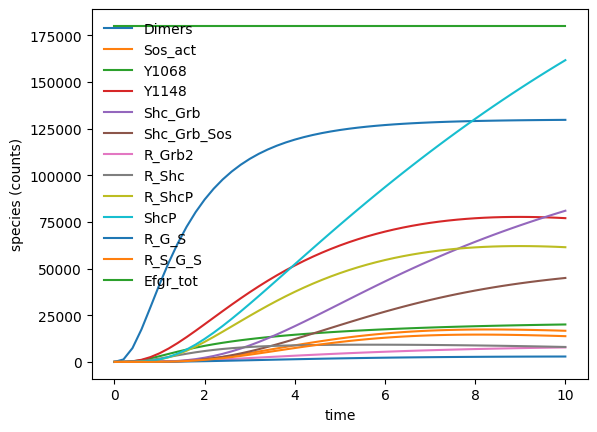

In [18]:
# Check ODE simulation output.
model_egfr_net.actions[0].args['atol'] = 1e-12
model_egfr_net.actions[0].args['rtol'] = 1e-6
model_egfr_net.actions[0].args['t_end'] = egfr_net_ss_time   
model_egfr_net.actions[0].args['n_steps'] = 50
%time result_egfr_net_ODE = bionetgen.run(model_egfr_net, suppress=True);
plot_result(result_egfr_net_ODE)
plt.savefig('../Plots/Trajectories/BioNetGen/egfr_net_ode.png')
plt.savefig('../Plots/Trajectories/BioNetGen/egfr_net_ode.pdf')

In [19]:
# Check ODE simulation time.
model_egfr_net_no_obs.actions[0].args['atol'] = 1e-12
model_egfr_net_no_obs.actions[0].args['rtol'] = 1e-6
model_egfr_net_no_obs.actions[0].args['t_end'] = egfr_net_ss_time   
model_egfr_net_no_obs.actions[0].args['n_steps'] = 50
%time bionetgen.run(model_egfr_net_no_obs, suppress=True);

CPU times: user 7.11 ms, sys: 0 ns, total: 7.11 ms
Wall time: 5.02 s


gdats from 0 models: 
cdats from 1 models: egfr_net_no_obs 

CPU times: user 6.26 ms, sys: 0 ns, total: 6.26 ms
Wall time: 4.86 s


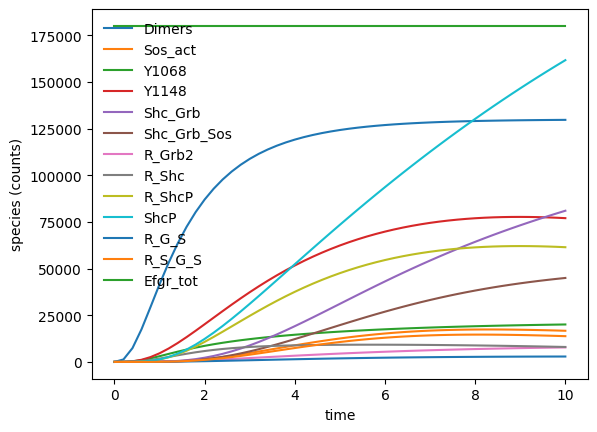

In [20]:
# Check (sparse) ODE simulation output.
model_egfr_net.actions[0].args['sparse'] = 1
%time result_egfr_net_ODE_sparse = bionetgen.run(model_egfr_net, suppress=True);
plot_result(result_egfr_net_ODE_sparse)
plt.savefig('../Plots/Trajectories/BioNetGen/egfr_net_ode_sparse.png')
plt.savefig('../Plots/Trajectories/BioNetGen/egfr_net_ode_sparse.pdf')

In [21]:
# Check (sparse) ODE simulation time.
model_egfr_net_no_obs.actions[0].args['sparse'] = 1
%time bionetgen.run(model_egfr_net_no_obs, suppress=True);

CPU times: user 7.49 ms, sys: 0 ns, total: 7.49 ms
Wall time: 4.83 s


gdats from 0 models: 
cdats from 1 models: egfr_net_no_obs 

#### Gillespie

In [22]:
# Prepare model for Gillespie simulations.
model_egfr_net.actions[0].args['t_end'] = egfr_net_ss_time   
model_egfr_net.actions[0].args['n_steps'] = 50
model_egfr_net.actions[0].args['method'] = '"ssa"'   
model_egfr_net_no_obs.actions[0].args['t_end'] = egfr_net_ss_time   
model_egfr_net_no_obs.actions[0].args['n_steps'] = 50
model_egfr_net_no_obs.actions[0].args['method'] = '"ssa"'    

CPU times: user 6.7 ms, sys: 0 ns, total: 6.7 ms
Wall time: 9.06 s


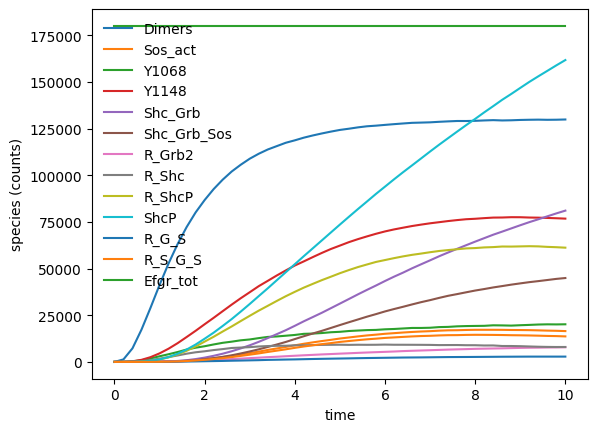

In [23]:
# Check Gillespie simulation output.
%time result_egfr_net_Gillespie = bionetgen.run(model_egfr_net, suppress=True);
plot_result(result_egfr_net_Gillespie)
plt.savefig('../Plots/Trajectories/BioNetGen/egfr_net_ssa.png')
plt.savefig('../Plots/Trajectories/BioNetGen/egfr_net_ssa.pdf')

In [24]:
# Check Gillespie simulation time.
%time bionetgen.run(model_egfr_net_no_obs, suppress=True);

CPU times: user 6.13 ms, sys: 0 ns, total: 6.13 ms
Wall time: 8.93 s


gdats from 0 models: 
cdats from 1 models: egfr_net_no_obs 

### BCR

#### ODE

In [92]:
model_BCR = bionetgen.bngmodel('../Data/BCR_new.bngl')

CPU times: user 91.8 ms, sys: 30.2 ms, total: 122 ms
Wall time: 43min 23s


<module 'matplotlib.pyplot' from '/home/torkelloman/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

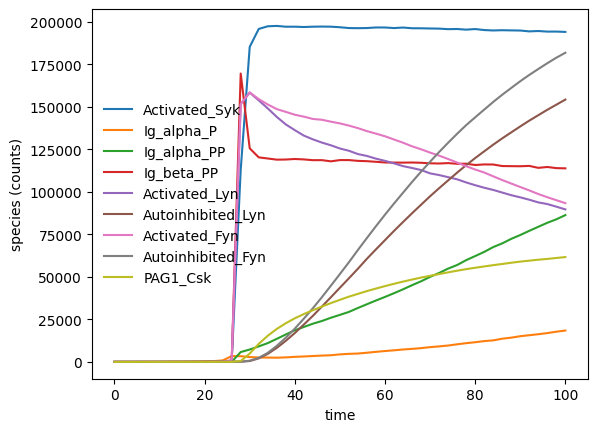

In [93]:
model_BCR.actions[0].args['method'] = '"ssa"'
model_BCR.actions[0].args['t_end'] = 100   
model_BCR.actions[0].args['n_steps'] = 50
%time result_BCRSSA_Gillespie = bionetgen.run(model_BCR, suppress=True);
plot_result(result_BCRSSA_Gillespie)

In [89]:
#model_BCR.add_action('simulate', {'method':'"ode"'})
model_BCR.actions[0].args['atol'] = 1e-12
model_BCR.actions[0].args['rtol'] = 1e-6
model_BCR.actions[0].args['t_end'] = 500   
model_BCR.actions[0].args['n_steps'] = 50

CPU times: user 21.5 ms, sys: 853 µs, total: 22.4 ms
Wall time: 1min 21s


<module 'matplotlib.pyplot' from '/home/torkelloman/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

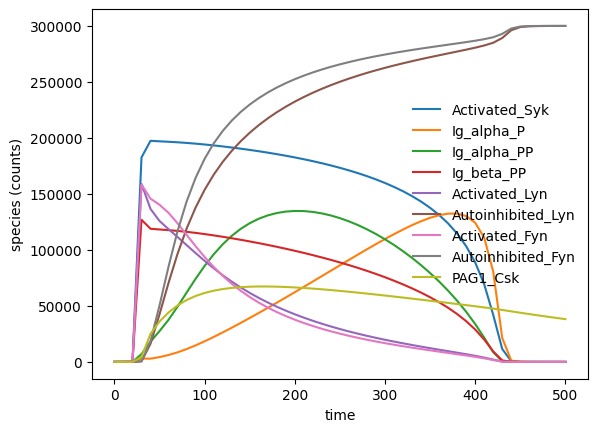

In [91]:
%time result_BCR_ODE = bionetgen.run(model_BCR, suppress=True);
plot_result(result_BCR_ODE)

CPU times: user 21.1 ms, sys: 2.87 ms, total: 24 ms
Wall time: 33.1 s


<module 'matplotlib.pyplot' from '/home/torkelloman/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

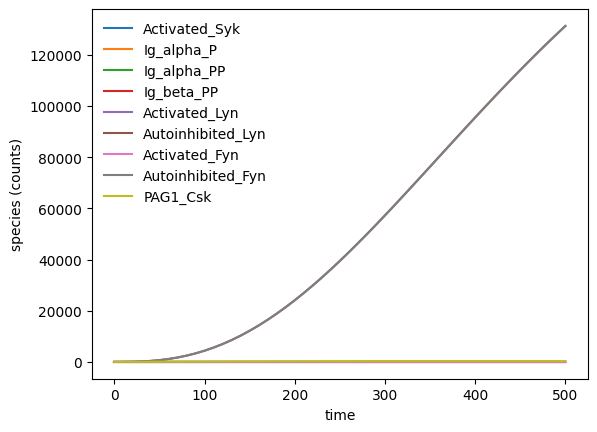

In [84]:
%time result_BCR_ODE = bionetgen.run(model_BCR, suppress=True);
plot_result(result_BCR_ODE)

In [73]:
%time result_BCR_ODE = bionetgen.run(model_BCR2, suppress=True);

CPU times: user 16 ms, sys: 5.5 ms, total: 21.5 ms
Wall time: 1min 21s


<module 'matplotlib.pyplot' from '/home/torkelloman/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

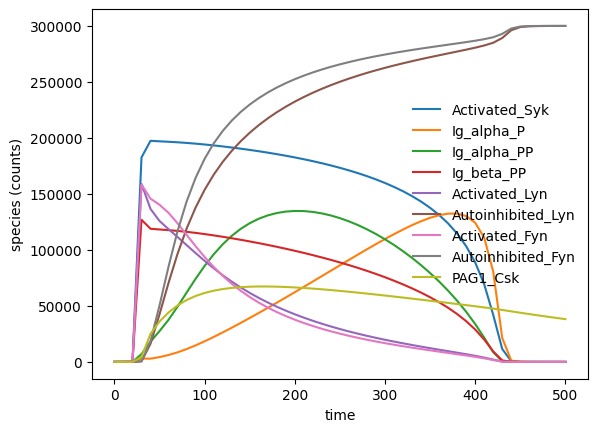

In [74]:
plot_result(result_BCR_ODE)

In [51]:
bcr_ss_time = 10000
model_BCR = bionetgen.bngmodel('../Data/BCR_new.bngl')

In [55]:
#model_BCR.add_action('simulate', {'method':'"ode"'})
model_BCR.actions[0].args['atol'] = 1e-12
model_BCR.actions[0].args['rtol'] = 1e-6
model_BCR.actions[0].args['t_end'] = 500   
model_BCR.actions[0].args['n_steps'] = 50

In [56]:
%time result_BCR_ODE = bionetgen.run(model_BCR, suppress=True);

CPU times: user 15.8 ms, sys: 3.91 ms, total: 19.7 ms
Wall time: 1min 20s


<module 'matplotlib.pyplot' from '/home/torkelloman/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

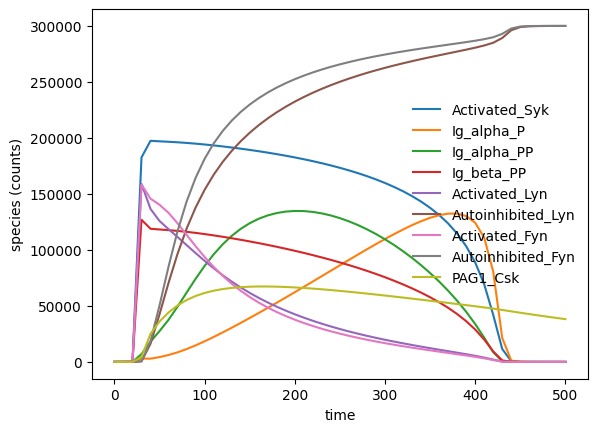

In [57]:
plot_result(result_BCR_ODE)

<module 'matplotlib.pyplot' from '/home/torkelloman/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

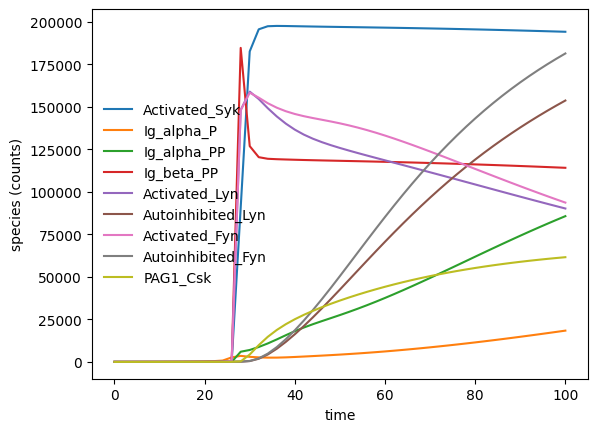

In [54]:
plot_result(result_BCR_ODE)

<module 'matplotlib.pyplot' from '/home/torkelloman/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

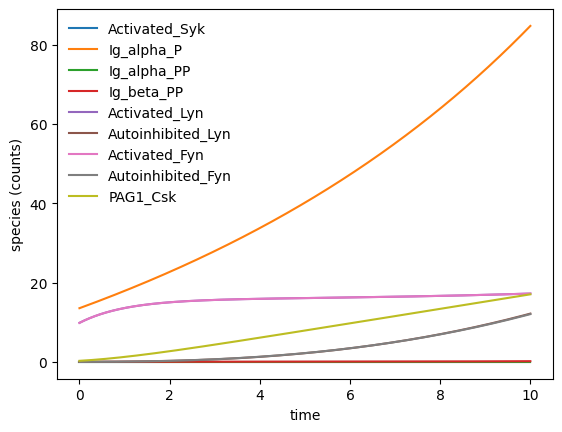

In [32]:
plot_result(result_BCR_ODE)

In [12]:
bcr_ss_time = 10000
model_BCR = bionetgen.bngmodel('../Data/BCR.bngl')

In [13]:
model_BCR.add_action('simulate', {'method':'"ode"'})
model_BCR.actions[0].args['atol'] = 1e-12
model_BCR.actions[0].args['rtol'] = 1e-6
model_BCR.actions[0].args['t_end'] = 10   
model_BCR.actions[0].args['n_steps'] = 50

In [ ]:
%time result_BCR_ODE = bionetgen.run(model_BCR, suppress=True);
plot_result(result_BCR_ODE)

In [7]:
bcr_ss_time = 10000
model_BCR = bionetgen.bngmodel('../Data/BCRSSA.xml')

In [ ]:
model_BCR.actions[0].args['atol'] = 1e-12
model_BCR.actions[0].args['rtol'] = 1e-6
model_BCR.actions[0].args['t_end'] = bcr_ss_time   
model_BCR.actions[0].args['n_steps'] = 50
%time result_BCR_ODE = bionetgen.run(model_BCR, suppress=True);
plot_result(result_BCR_ODE)

In [41]:
# Load model.
bcr_ss_time = 10000
model_BCR = bionetgen.bngmodel('../Data/BCR.bngl')
model_BCR_no_obs = bionetgen.bngmodel('../Data/BCR_no_obs.bngl')

In [9]:
bcr_ss_time = 10000
model_BCR = bionetgen.bngmodel('../Data/BCRSSA.xml')
model_BCR.add_action('simulate', {'method':'"ode"', 't_end':bcr_ss_time, 'n_steps':50})

CPU times: user 51.3 ms, sys: 862 µs, total: 52.2 ms
Wall time: 1min 53s


<module 'matplotlib.pyplot' from '/home/torkelloman/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

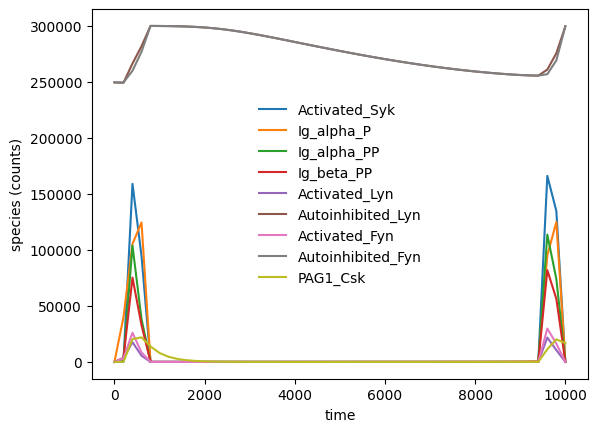

In [10]:
model_BCR.actions[0].args['atol'] = 1e-12
model_BCR.actions[0].args['rtol'] = 1e-6
model_BCR.actions[0].args['t_end'] = bcr_ss_time   
model_BCR.actions[0].args['n_steps'] = 50
%time result_BCR_ODE = bionetgen.run(model_BCR, suppress=True);
plot_result(result_BCR_ODE)

CPU times: user 24.6 ms, sys: 334 µs, total: 24.9 ms
Wall time: 30.3 s


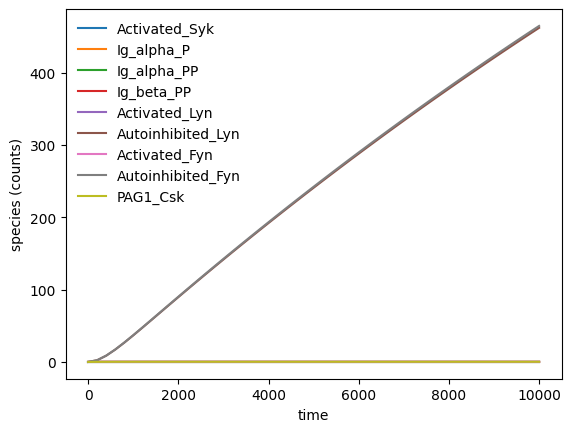

In [42]:
# Check ODE simulation output.
model_BCR.actions[0].args['atol'] = 1e-12
model_BCR.actions[0].args['rtol'] = 1e-6
model_BCR.actions[0].args['t_end'] = bcr_ss_time   
model_BCR.actions[0].args['n_steps'] = 50
%time result_BCR_ODE = bionetgen.run(model_BCR, suppress=True);
plot_result(result_BCR_ODE)
plt.savefig('../Plots/Trajectories/BioNetGen/BCR_ode.png')
plt.savefig('../Plots/Trajectories/BioNetGen/BCR_ode.pdf')

In [43]:
# Check ODE simulation time.
model_BCR_no_obs.actions[0].args['atol'] = 1e-12
model_BCR_no_obs.actions[0].args['rtol'] = 1e-6
model_BCR_no_obs.actions[0].args['t_end'] = bcr_ss_time   
model_BCR_no_obs.actions[0].args['n_steps'] = 50
%time bionetgen.run(model_BCR_no_obs, suppress=True);

CPU times: user 16.6 ms, sys: 339 µs, total: 16.9 ms
Wall time: 28.9 s


gdats from 0 models: 
cdats from 1 models: BCR_no_obs 

CPU times: user 11.6 ms, sys: 7.68 ms, total: 19.3 ms
Wall time: 1min 25s


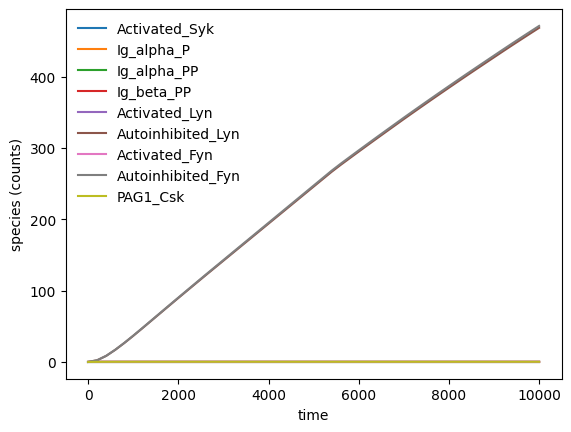

In [44]:
# Check (sparse) ODE simulation output.
model_BCR.actions[0].args['sparse'] = 1
%time result_BCR_ODE_sparse = bionetgen.run(model_BCR, suppress=True);
plot_result(result_BCR_ODE_sparse)
plt.savefig('../Plots/Trajectories/BioNetGen/BCR_ode_sparse.png')
plt.savefig('../Plots/Trajectories/BioNetGen/BCR_ode_sparse.pdf')

In [45]:
# Check (sparse) ODE simulation time.
model_BCR_no_obs.actions[0].args['sparse'] = 1
%time bionetgen.run(model_BCR_no_obs, suppress=True);

CPU times: user 13.9 ms, sys: 5.45 ms, total: 19.4 ms
Wall time: 1min 24s


gdats from 0 models: 
cdats from 1 models: BCR_no_obs 

#### Gillespie

In [11]:
# Load model.
model_BCRSSA = bionetgen.bngmodel('../Data/BCRSSA.xml')
model_BCRSSA.add_action('simulate', {'method':'"ssa"', 't_end':bcr_ss_time, 'n_steps':50})

In [ ]:
# Load model.
model_BCRSSA = bionetgen.bngmodel('../Data/BCRSSA.xml')
model_BCRSSA.add_action('simulate', {'method':'"ssa"', 't_end':10, 'n_steps':50})

In [12]:
%time result_BCRSSA_Gillespie = bionetgen.run(model_BCRSSA, suppress=True);
plot_result(result_BCRSSA_Gillespie)

CPU times: user 474 ms, sys: 313 ms, total: 788 ms
Wall time: 4h 53min 57s


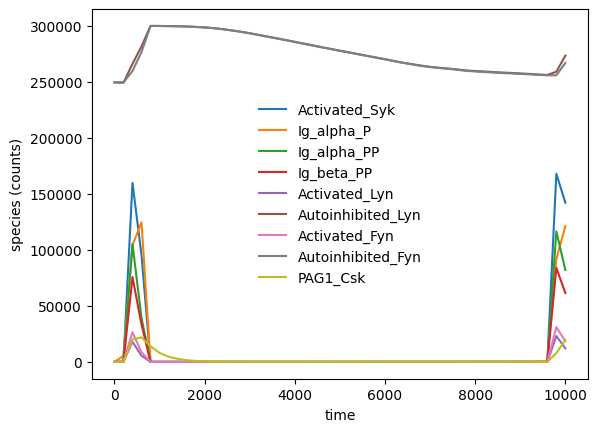

In [47]:
# Check Gillespie simulation output.
%time result_BCRSSA_Gillespie = bionetgen.run(model_BCRSSA, suppress=True);
plot_result(result_BCRSSA_Gillespie)
plt.savefig('../Plots/Trajectories/BioNetGen/BCR_ssa.png')
plt.savefig('../Plots/Trajectories/BioNetGen/BCR_ssa.pdf')

In [48]:
# Check Gillespie simulation time.
%time bionetgen.run(model_BCRSSA, suppress=True);

CPU times: user 440 ms, sys: 329 ms, total: 770 ms
Wall time: 4h 58min 45s


gdats from 1 models: BCRSSA 
cdats from 1 models: BCRSSA 

### Fceri_gamma2

In [49]:
# Load model.
fceri_gamma2_ss_time = 150
model_fceri_gamma2 = bionetgen.bngmodel('../Data/fceri_gamma2.bngl')
model_fceri_gamma2_no_obs = bionetgen.bngmodel('../Data/fceri_gamma2_no_obs.bngl')

CPU times: user 36.7 ms, sys: 20.4 ms, total: 57.1 ms
Wall time: 13min 4s


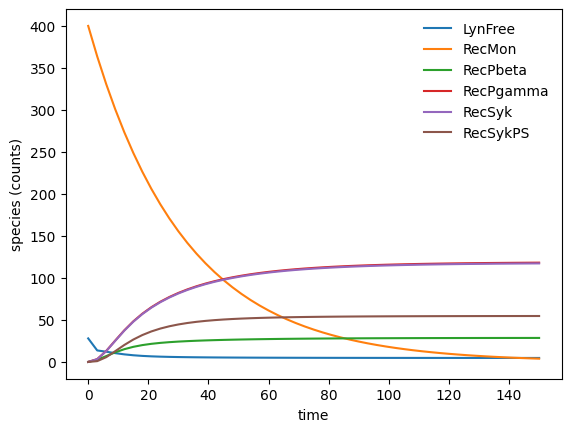

In [50]:
# Check ODE simulation output.
model_fceri_gamma2.actions[0].args['atol'] = 1e-12
model_fceri_gamma2.actions[0].args['rtol'] = 1e-6
model_fceri_gamma2.actions[0].args['t_end'] = fceri_gamma2_ss_time   
model_fceri_gamma2.actions[0].args['n_steps'] = 50
%time result_fceri_gamma2_ODE = bionetgen.run(model_fceri_gamma2, suppress=True);
plot_result(result_fceri_gamma2_ODE)
plt.savefig('../Plots/Trajectories/BioNetGen/fceri_gamma2_ode.png')
plt.savefig('../Plots/Trajectories/BioNetGen/fceri_gamma2_ode.pdf')

In [51]:
# Check ODE simulation time.
model_fceri_gamma2_no_obs.actions[0].args['atol'] = 1e-12
model_fceri_gamma2_no_obs.actions[0].args['rtol'] = 1e-6
model_fceri_gamma2_no_obs.actions[0].args['t_end'] = fceri_gamma2_ss_time   
model_fceri_gamma2_no_obs.actions[0].args['n_steps'] = 50
%time bionetgen.run(model_fceri_gamma2_no_obs, suppress=True);

CPU times: user 40.5 ms, sys: 17.7 ms, total: 58.2 ms
Wall time: 13min 11s


gdats from 0 models: 
cdats from 1 models: fceri_gamma2_no_obs 

CPU times: user 21.5 ms, sys: 2.14 ms, total: 23.6 ms
Wall time: 1min 18s


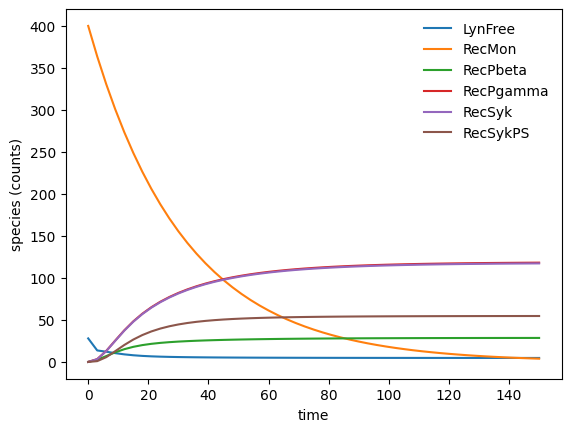

In [52]:
# Check (sparse) ODE simulation output.
model_fceri_gamma2.actions[0].args['sparse'] = 1
%time result_fceri_gamma2_ODE_sparse = bionetgen.run(model_fceri_gamma2, suppress=True);
plot_result(result_fceri_gamma2_ODE_sparse)
plt.savefig('../Plots/Trajectories/BioNetGen/fceri_gamma2_ode_sparse.png')
plt.savefig('../Plots/Trajectories/BioNetGen/fceri_gamma2_ode_sparse.pdf')

In [53]:
# Check (sparse) ODE simulation time.
model_fceri_gamma2_no_obs.actions[0].args['sparse'] = 1
%time bionetgen.run(model_fceri_gamma2_no_obs, suppress=True);

CPU times: user 11.3 ms, sys: 11.6 ms, total: 22.8 ms
Wall time: 1min 16s


gdats from 0 models: 
cdats from 1 models: fceri_gamma2_no_obs 

#### Gillespie

In [54]:
# Prepare model for Gillespie simulations.
model_fceri_gamma2.actions[0].args['t_end'] = fceri_gamma2_ss_time   
model_fceri_gamma2.actions[0].args['n_steps'] = 50
model_fceri_gamma2.actions[0].args['method'] = '"ssa"'  
model_fceri_gamma2_no_obs.actions[0].args['t_end'] = fceri_gamma2_ss_time   
model_fceri_gamma2_no_obs.actions[0].args['n_steps'] = 50
model_fceri_gamma2_no_obs.actions[0].args['method'] = '"ssa"'    

CPU times: user 24.6 ms, sys: 3.26 ms, total: 27.8 ms
Wall time: 2min 14s


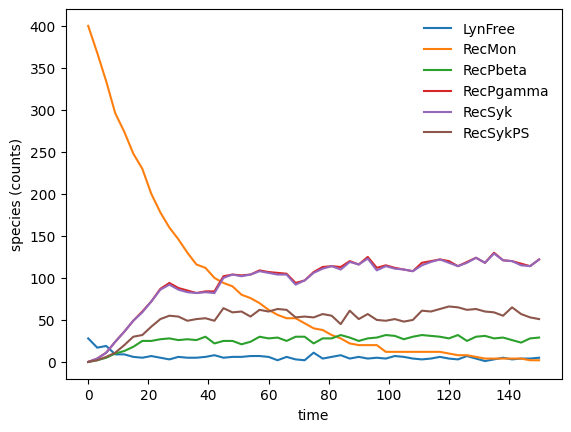

In [55]:
# Check Gillespie simulation output.
%time result_fceri_gamma2_Gillespie = bionetgen.run(model_fceri_gamma2, suppress=True);
plot_result(result_fceri_gamma2_Gillespie)
plt.savefig('../Plots/Trajectories/BioNetGen/fceri_gamma2_ssa.png')
plt.savefig('../Plots/Trajectories/BioNetGen/fceri_gamma2_ssa.pdf')

In [56]:
# Check Gillespie simulation time.
%time bionetgen.run(model_fceri_gamma2_no_obs, suppress=True);

CPU times: user 23.8 ms, sys: 2.08 ms, total: 25.9 ms
Wall time: 2min 15s


gdats from 0 models: 
cdats from 1 models: fceri_gamma2_no_obs 